In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('Preprocessed_data.csv')
data

,Title,category
0,campbell natural light italianstyle vegetable ...,Grocery and Gourmet Food
1,hawaiian sun strawberry guava jam large,Grocery and Gourmet Food
2,beef flat iron natural angus choice xoz,Grocery and Gourmet Food
3,k coffee company sierra madre central american...,Grocery and Gourmet Food
4,cafix coffee substitute ounce per case,Grocery and Gourmet Food
...,...,...
79995,pleaser woman kissuvwsanw platform dress sandal,Clothing Shoes and Jewelry
79996,mordenmiss woman autumn casual dress travel ho...,Clothing Shoes and Jewelry
79997,friendshop sheer back slim clubwear cocktail h...,Clothing Shoes and Jewelry
79998,seya twotone modern jewelry box organizer,Clothing Shoes and Jewelry


In [4]:
#delete book category
data = data[data['category']!='Books'].reset_index(drop=True)

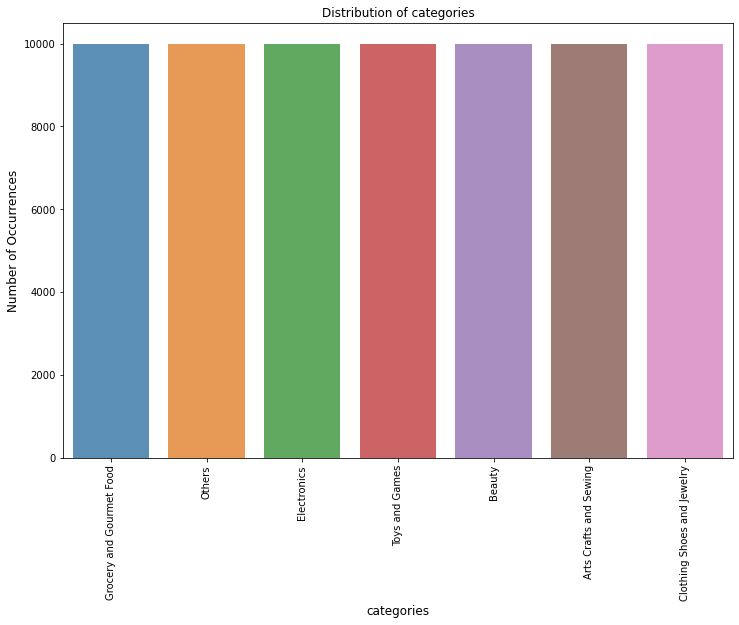

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

cnt_pro = data['category'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('categories', fontsize=12)
plt.title("Distribution of categories")
plt.xticks(rotation=90)
plt.show();

In [7]:
#preparing y

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
labelEncode = le.fit_transform(data["category"])
print("LabelEncode")
print(labelEncode)
categorical_y = to_categorical(labelEncode)
print("To_Categorical")
print(categorical_y)

LabelEncode
[4 4 4 ... 2 2 2]
To_Categorical
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


4,Grocery and Gourmet Food

5,Others

3,Electronics

6,Toys and Games

1,Beauty

0,Arts Crafts and Sewing

2,Clothing Shoes and Jewelry
######







In [9]:
textList=[]
for text in data["Title"]:
    textList.append(text)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
# First, we need a vectorizer object
Text=[]
for text in data["Title"]:
    Text.append(text)
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(Text).toarray()
pickle.dump(vectorizer, open('TF-IDF.pkl', "wb"))
xx=  pd.DataFrame(x)
xx

,0,1,2,3,4,5,6,7,8,9,...,54142,54143,54144,54145,54146,54147,54148,54149,54150,54151
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle

x_train,x_test,y_train,y_test = train_test_split(x,categorical_y,test_size=0.2,random_state=42)

In [12]:
y_train.shape

(56000, 7)

# Artificial Neural Network

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adamax, Adam, SGD # - Works
from keras.utils.vis_utils import plot_model
from keras.losses import categorical_crossentropy

def build_ann_model(x_train):
    model = Sequential()
    
    model.add(Dense(units=1024,activation="relu",input_dim=x_train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(units=512,activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(units=256,activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(units=y_train.shape[1],activation="softmax"))
    optimizer = Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adam")
    
    model.compile(optimizer=optimizer,metrics=["accuracy"],loss=categorical_crossentropy)
    return model

In [44]:
from sklearn.feature_selection import SelectPercentile, chi2
from tensorflow import keras
from sklearn.metrics import accuracy_score
import pickle
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

ann_model = build_ann_model(x_train)
#plot_model(ann_model,show_shapes=True)

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.hdf5', verbose=1, save_best_only=True)
start = datetime.now()
ann_history = ann_model.fit(x_train,y_train,epochs=20,batch_size=200,shuffle=True,validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)
y_pred = ann_model.predict(x_test)





Epoch 1/20
280/280 [==============================] - ETA: 0s - loss: 1.9420 - accuracy: 0.2886
Epoch 1: val_loss improved from inf to 1.93333, saving model to saved_models/weights.best.basic_mlp.hdf5
280/280 [==============================] - 68s 235ms/step - loss: 1.9420 - accuracy: 0.2886 - val_loss: 1.9333 - val_accuracy: 0.5315
Epoch 2/20
280/280 [==============================] - ETA: 0s - loss: 1.8969 - accuracy: 0.5952
Epoch 2: val_loss improved from 1.93333 to 1.81770, saving model to saved_models/weights.best.basic_mlp.hdf5
280/280 [==============================] - 61s 216ms/step - loss: 1.8969 - accuracy: 0.5952 - val_loss: 1.8177 - val_accuracy: 0.6939
Epoch 3/20
280/280 [==============================] - ETA: 0s - loss: 1.6372 - accuracy: 0.6945
Epoch 3: val_loss improved from 1.81770 to 1.40480, saving model to saved_models/weights.best.basic_mlp.hdf5
280/280 [==============================] - 59s 211ms/step - loss: 1.6372 - accuracy: 0.6945 - val_loss: 1.4048 - val_accu

In [45]:
from sklearn.metrics import accuracy_score
ann_accuracy = accuracy_score(y_test.argmax(axis=-1),y_pred.argmax(axis=-1))

print("The best accuracy befor feature selection is" , ann_accuracy)
ann_model.save('ANN-N.h5')

The best accuracy befor feature selection is 0.9002857142857142


In [14]:
# Reload model 

In [15]:
from keras import models
model = models.load_model('ANN-N.h5')
y_pred = model.predict(x_test)

438/438 [==============================] - 12s 26ms/step


438/438 [==============================] - 11s 25ms/step


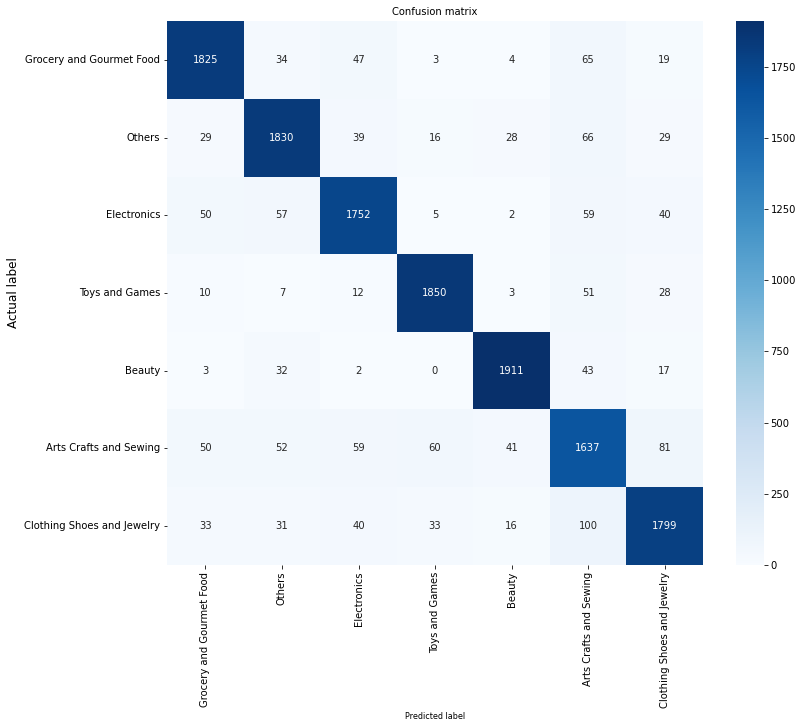

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

#Function to plot confusion matrix for the passed model and the data
def plot_confusion_matrix(model, X_test, y_test):
    
    classes = data.category.unique()
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=-1),y_pred.argmax(axis=-1))
    # plot confusion matrix
    plt.figure(figsize=(12,10))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=classes,
                yticklabels=classes)
    plt.title('Confusion matrix', fontsize=10)
    plt.xlabel('Predicted label', fontsize=8)
    plt.ylabel('Actual label', fontsize=12)

plot_confusion_matrix(model, x_test, y_test)

In [20]:
cm=confusion_matrix(y_test.argmax(axis=-1),y_pred.argmax(axis=-1))
import numpy as np
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('True positive rate',TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('True negative rate',TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print('False positive rate',FPR)
# False negative rate
FNR = FN/(TP+FN)
print('False negative rate',FNR)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('ACC',ACC)
print('**********************************')
acc = np.diag(cm).sum() / cm.sum()
print('acc',acc)


True positive rate [0.91387081 0.89837997 0.89160305 0.94339623 0.95169323 0.82676768
 0.87670565]
True negative rate [0.98542031 0.9821951  0.98346489 0.99028158 0.99216144 0.96805324
 0.98208905]
False positive rate [0.01457969 0.0178049  0.01653511 0.00971842 0.00783856 0.03194676
 0.01791095]
False negative rate [0.08612919 0.10162003 0.10839695 0.05660377 0.04830677 0.17323232
 0.12329435]
ACC [0.97521429 0.97       0.97057143 0.98371429 0.98635714 0.94807143
 0.96664286]
**********************************
acc 0.9002857142857142
